# Cleaning the Dataset for Model training 



In [185]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
df = pd.read_csv('./dataset/house_prices.csv')


In [18]:
df.shape

(187531, 21)

Removing unwanted features!

In [ ]:
df.drop('Index', axis=1, inplace=True)
df.drop('Dimensions', axis=1, inplace=True)
df.drop('Plot Area',axis=1,inplace=True)
df.drop('Transaction',axis=1,inplace=True)
df.drop('overlooking',axis=1,inplace=True)
df.drop('Super Area',axis=1,inplace=True)
df.drop('Ownership',axis=1,inplace=True)
df.drop('Society',axis=1,inplace=True)
df.drop('Balcony',axis=1,inplace=True)
df.drop('facing',axis=1,inplace=True)
df.drop('Description',axis=1,inplace=True)
df.drop('Amount(in rupees)',axis=1,inplace=True)
df.drop('Floor',axis=1,inplace=True)
df.drop('Status',axis=1,inplace=True)

Creating a new col 'BHK' and getting value from 'Title' and removing 'Title' col.

In [69]:
df['BHK'] = df['Title'].str.split().str[0].apply(lambda x: int(x) if x.isdigit() else random.randint(1,3))
df.drop('Title', axis=1, inplace=True)

Renaming 'Carpet Area' to 'Area' & removing any predecessor text.

In [ ]:
df.rename(columns={'Carpet Area': 'Area'}, inplace=True)
df['Area'] = (
    df['Area']
        .str.extract(r'(\d+)')       
        .astype(float)                
        .apply(lambda x: x if not np.isnan(x) else random.uniform(400.0, 1000.0))
)


Replacing NaN values from 'Bathroom' to random(1,2)


In [103]:
df['Bathroom'] = (
    df['Bathroom']
        .astype(str)
        .str.extract(r'(\d+)')
        .astype(float)
        .fillna(np.random.randint(1, 3))
        .astype(int)
)



Renaming the coloumn 'Price (in rupees)' to 'Price'

In [107]:
df.rename(columns={'Price (in rupees)': 'Price'}, inplace=True)

Fixing 'Price' by removing NaN values and replacing with random of (25% ~ 75%) of data 

In [118]:
df['Price']=df['Price'].apply(lambda x : x if not np.isnan(x) else random.uniform(4000.0,9000.0))

Filling up missing furnishing using random.choice

In [125]:
df['Furnishing']=df['Furnishing'].fillna(random.choice(['Semi-Furnished','Unfurnished','Furnished']))

In [128]:
df.rename(columns={'Furnishing':'Furnish'},inplace=True)

Fixing Car parking and removing wierd ahh numbers like 200,300! LOL ITS NOT POSSBLE!

In [ ]:
df['Car Parking'] = (
    df['Car Parking']
    .astype(str)
    .str.extract(r'(\d+)') 
    .astype(int)
)

df['Car Parking'] = df['Car Parking'].apply(
    lambda x: x if pd.notna(x) and 0 <= x <= 10 else random.randint(0, 10)
)

2k rs - 10 car parking is a lil wierd right? 
- Let's fix!


In [ ]:
def calc_parking(row):
    price = row['Price']
    furnish = row['Furnish']
    
    if price < 7000:
        base = random.randint(0, 2)
    elif price < 12000:
        base = random.randint(2, 5)
    else:
        base = random.randint(4, 8)

    if furnish == 'Furnished':
        base += 2
    elif furnish == 'Semi-Furnished':
        base += 1

    return min(base, 10)

df['Car Parking'] = df.apply(calc_parking, axis=1)


0 null finally!


In [144]:
df.isna().sum()


Price          0
location       0
Area           0
Furnish        0
Bathroom       0
Car Parking    0
BHK            0
dtype: int64

Lets check the data Distribution Now!

In [161]:
df.describe()

,Price,Area,Bathroom,Car Parking,BHK
count,1.875310e+05,187531.000000,187531.000000,187531.000000,187531.000000
mean,7.482020e+03,984.770923,2.421754,2.919123,2.565608
std,2.593265e+04,2315.533757,0.872598,2.106221,0.781681
min,0.000000e+00,1.000000,1.000000,0.000000,1.000000
25%,4.460000e+03,605.000000,2.000000,1.000000,2.000000
50%,6.070000e+03,850.000000,2.000000,2.000000,3.000000
75%,8.636000e+03,1136.000000,3.000000,4.000000,3.000000
max,6.700000e+06,709222.000000,10.000000,10.000000,10.000000


Fix Area (remove garbage and outliers)

In [ ]:
df = df[(df['Area'] >= 200) & (df['Area'] <= 3000)]


Fix Price (remove or replace unrealistic values)

In [181]:
df['Price'] = df['Price'].clip(lower=3000, upper=100000)


C:\Users\kunal\AppData\Local\Temp\ipykernel_9808\420196043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].clip(lower=3000, upper=100000)


Recompute missing or broken Price values

In [182]:
def fix_price(row):
    price = row['Price']
    area = row['Area']
    bhk = row['BHK']
    furnish = row['Furnish']
    
    if price < 3000:
        price = (area * 20) + (bhk * 1500)
        
        if furnish == "Semi-Furnished":
            price += 2000
        elif furnish == "Furnished":
            price += 4000
            
        price += random.randint(500, 2000)

    return round(price, 2)

df['Price'] = df.apply(fix_price, axis=1)


C:\Users\kunal\AppData\Local\Temp\ipykernel_9808\552412983.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df.apply(fix_price, axis=1)


In [183]:
df.describe() 


,Price,Area,Bathroom,Car Parking,BHK
count,178001.000000,178001.000000,178001.000000,178001.000000,178001.000000
mean,23235.654285,953.541873,2.399425,2.902175,2.551132
std,8211.507447,459.701751,0.830188,2.081418,0.757965
min,5961.000000,200.000000,1.000000,0.000000,1.000000
25%,17562.440000,634.071187,2.000000,1.000000,2.000000
50%,21152.850000,853.656262,2.000000,2.000000,3.000000
75%,27142.000000,1130.000000,3.000000,4.000000,3.000000
max,69091.000000,3000.000000,10.000000,10.000000,10.000000


DATA VISUALISATION

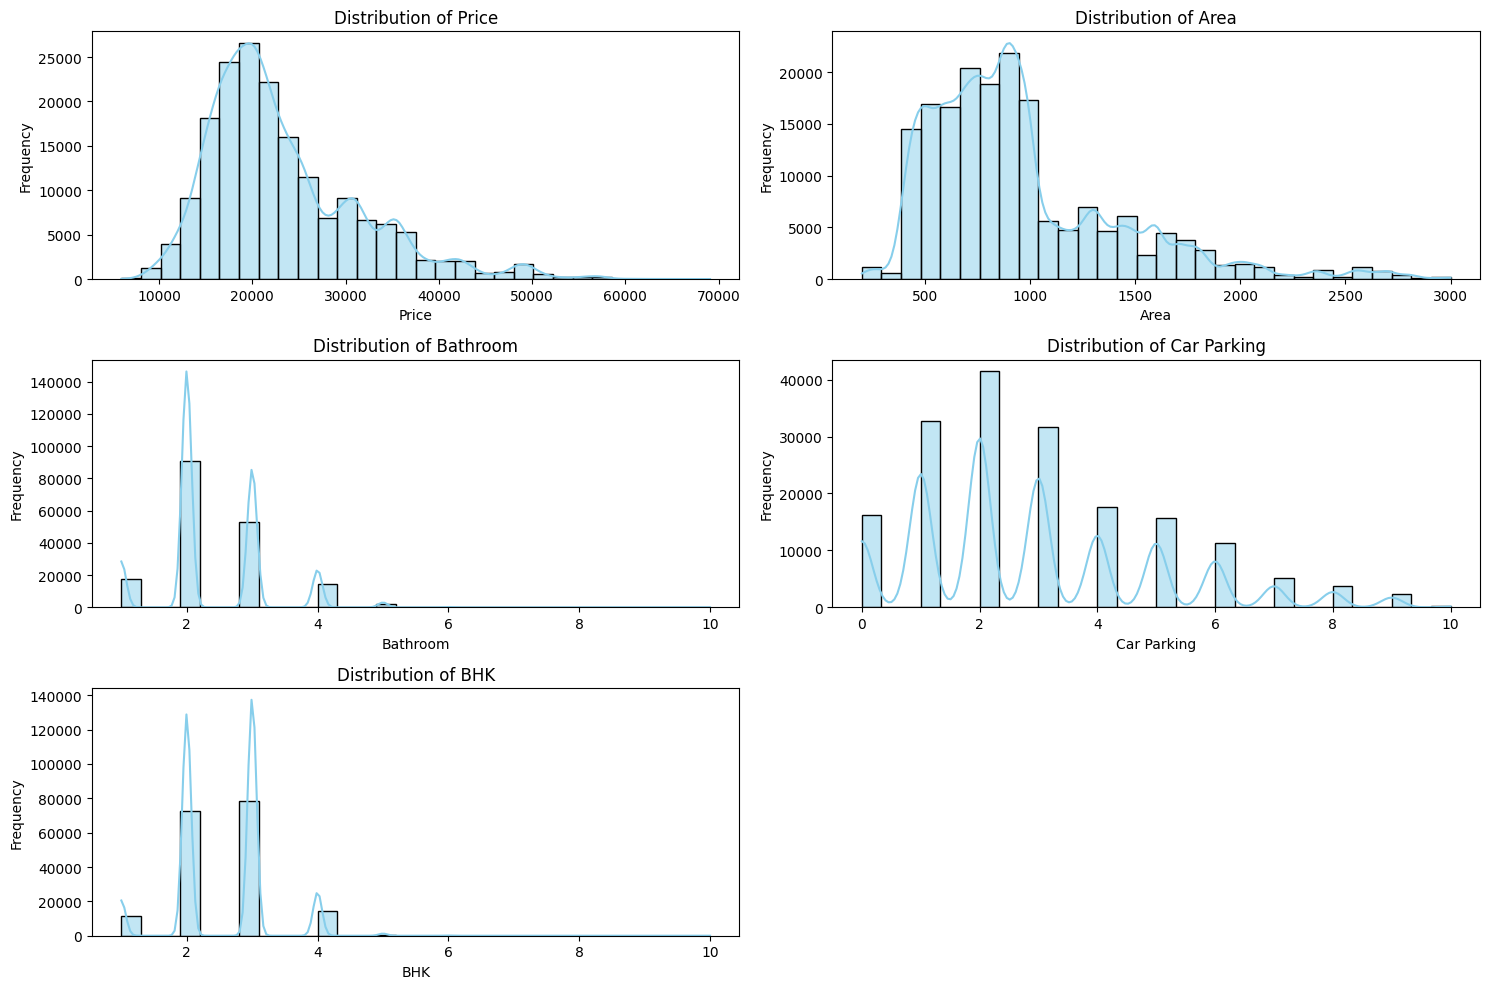

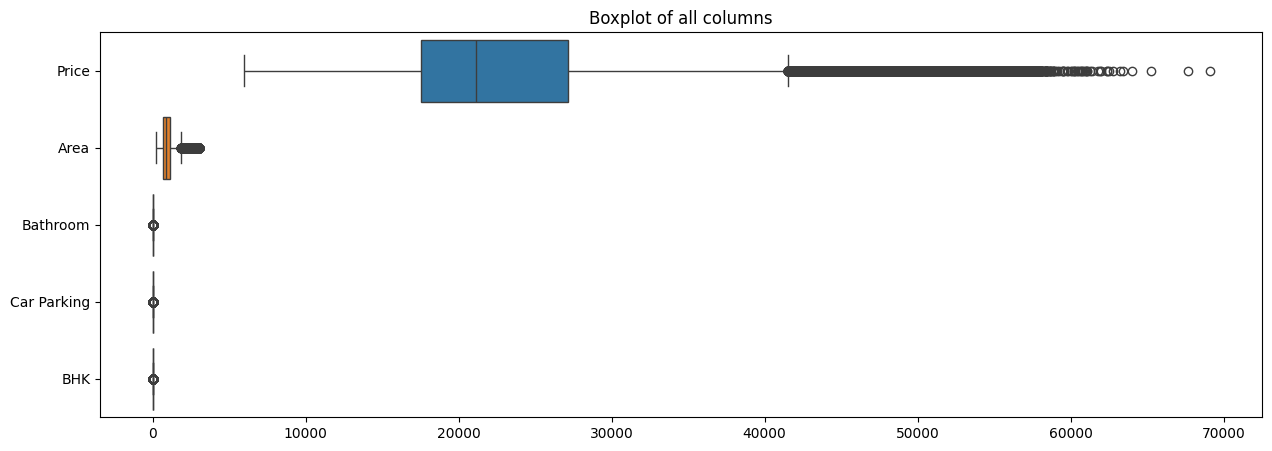

In [ ]:
columns = ['Price', 'Area', 'Bathroom', 'Car Parking', 'BHK']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(data=df[columns], orient='h')
plt.title('Boxplot of all columns')
plt.show()

In [187]:

df.to_csv('dataset/cleaned_data.csv', index=False)
